# Differential Equation for Conductance

Here we want to numerically solve a first-order partial linear ordinary differential equation for the function $g[V(t),t]$. The equation reads

$\frac{\partial g[V(t),t]}{\partial t} = \frac{g_{\infty}[V(t)]-g[V(t),t]}{\tau}$

and physically describes the dynamics of the conductance in an ionic channel [arXiv:2309.11438]. It depends on time $t$ and on the potential $V(t)$. The function $g_{\infty}[V(t)]$ represents the steady solution (at long times), therefore an exponential relaxation towards the steady state is above implied. The time that characterizes this relaxation is $\tau$. 

In the following I will use expressions and parameters that describe the system in [arXiv:2309.11438] and reproduce the results in the paper. 

>The goal is to change the shape of the potential $V(t)$ in time to **obtain an ionic channel that can be used to connect nodes in a trainable network**.

In [6]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
sys.path.append('../codes/')
import odeint_solver
import plotting_functions
from parameters import *
import potential_shapes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Reproducing results

In the following, we choose a voltage dependent on time with a triangular shape which oscillates in the range $[-1,1]$, as in the paper. Let us first compute the steady solution for this particular potential shape, as in Eq. (5).

In [13]:
potential_shapes.potential(0, shape='triangular' , write=True)
odeint_solver.steady_solution(potential_shape='triangular')
fig, ax = plt.subplots()
plotting_functions.plot_voltage(ax)
plotting_functions.plot_steady_solution(ax)
ax.legend(fontsize=legend_size)
fig.tight_layout()

TypeError: potential() missing 1 required positional argument: 'shape'

And here the solution of the differential equation with this potential and steady solution. To solve the equation I used both ODEINT package and a simple Euler Forward scheme, they give the same result.

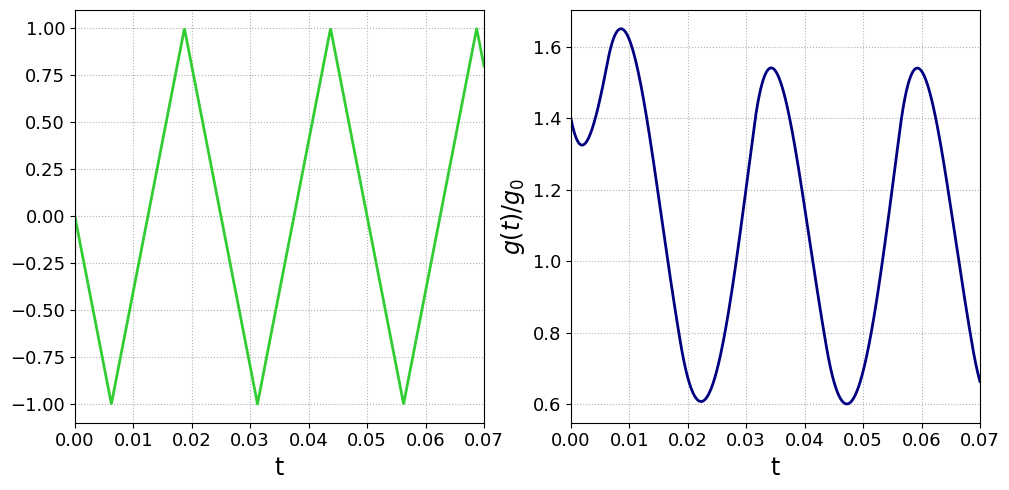

In [4]:
odeint_solver.odeint_solver_function('triangular')
potential_shapes.potential(0, 'triangular', write=True)
fig, ax = plt.subplots(1,2, figsize=(10,5))
plotting_functions.plot_voltage(ax[0])
plotting_functions.plot_gsolution(ax[1], solver = 'odeint')
fig.tight_layout()

The conductance as a function of the potential reaches a limit cyle after the first potential pulse. 

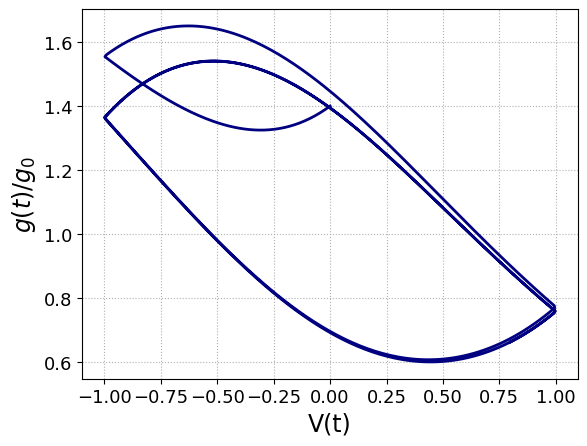

In [5]:
fig, ax = plt.subplots()
plotting_functions.plot_conductance_voltage(ax)